<a href="https://colab.research.google.com/github/syahmishamz/Data-Mining/blob/main/Assignment1/AssignmentPart1_Codes_Section04_0371440.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Mining (ITS61504) Assignment 1**


---



#Import libraries

Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

#Clone GitHub Repo

In [ ]:
!git clone https://github.com/syahmishamz/Data-Mining.git

Cloning into 'Data-Mining'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 579.21 KiB | 8.91 MiB/s, done.
Resolving deltas: 100% (2/2), done.


#Load the dataset

In [ ]:
file = '/content/Data-Mining/Accidental_Drug_Related_Deaths.csv'

In [ ]:
data = pd.read_csv(file)
data.head(20)

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,05/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,06/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,03/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,01/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"
5,06/13/2017,Date reported,57.0,Male,White,NaN,BLANDFORD,HAMPDEN,MA,ENFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ENFIELD, CT\n(41.976501, -72.591985)","Enfield, CT\n(41.976501, -72.591985)"
6,10/20/2015,Date reported,26.0,Male,White,NaN,DANBURY,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"DANBURY, CT\n(41.393666, -73.451539)","DANBURY, CT\n(41.393666, -73.451539)","Danbury, CT\n(41.393666, -73.451539)"
7,02/02/2017,Date reported,64.0,Male,White,NaN,MILFORD,NEW HAVEN,CT,MILFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MILFORD, CT\n(41.224276, -73.057564)","MILFORD, CT\n(41.224276, -73.057564)","Milford, CT\n(41.224276, -73.057564)"
8,07/03/2018,Date of death,33.0,Male,NaN,NaN,NaN,NaN,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)","HARTFORD, CT\n(41.765775, -72.673356)","Hartford, CT\n(41.765775, -72.673356)"
9,05/08/2013,Date of death,23.0,Male,White,NaN,BETHEL,FAIRFIELD,NaN,BETHEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BETHEL, CT\n(41.371727, -73.407448)","BETHEL, CT\n(41.371727, -73.407448)","Bethel, CT\n(41.371727, -73.407448)"


#EDA

Number of rows and columns (r x c)

In [ ]:
data.shape

(11981, 48)

Check data types

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           11981 non-null  object 
 1   Date Type                      11981 non-null  object 
 2   Age                            11979 non-null  float64
 3   Sex                            11972 non-null  object 
 4   Race                           11924 non-null  object 
 5   Ethnicity                      2565 non-null   object 
 6   Residence City                 11385 non-null  object 
 7   Residence County               10721 non-null  object 
 8   Residence State                9993 non-null   object 
 9   Injury City                    11803 non-null  object 
 10  Injury County                  8647 non-null   object 
 11  Injury State                   8952 non-null   object 
 12  Injury Place                   11623 non-null 

Check for number of missing values in each column

In [ ]:
print(data.isnull().sum())

Date                                 0
Date Type                            0
Age                                  2
Sex                                  9
Race                                57
Ethnicity                         9416
Residence City                     596
Residence County                  1260
Residence State                   1988
Injury City                        178
Injury County                     3334
Injury State                      3029
Injury Place                       358
Description of Injury              807
Death City                        2784
Death County                      3891
Death State                       5108
Location                          1349
Location if Other                10787
Cause of Death                       0
Manner of Death                      9
Other Significant Conditions     10782
Heroin                            8403
Heroin death certificate (DC)    11241
Cocaine                           7403
Fentanyl                 

In [ ]:
print(data.isnull().sum())

Date                                 0
Date Type                            0
Age                                  2
Sex                                  9
Race                                57
Ethnicity                         9416
Residence City                     596
Residence County                  1260
Residence State                   1988
Injury City                        178
Injury County                     3334
Injury State                      3029
Injury Place                       358
Description of Injury              807
Death City                        2784
Death County                      3891
Death State                       5108
Location                          1349
Location if Other                10787
Cause of Death                       0
Manner of Death                      9
Other Significant Conditions     10782
Heroin                            8403
Heroin death certificate (DC)    11241
Cocaine                           7403
Fentanyl                 

Total number of missing values

In [ ]:
print(data.isnull().sum().sum())

290643


Show number of duplicated rows

In [ ]:
duplicates = data.duplicated()
num_duplicates = duplicates.sum() #Count number of duplicated rows
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


Check for outliers (Age variable)

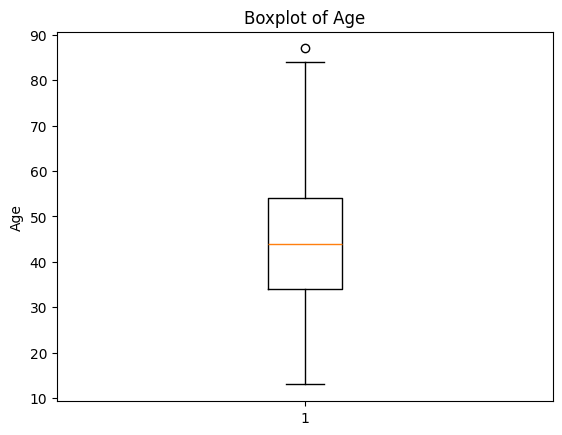

In [ ]:
plt.boxplot(data['Age'].dropna())  # Drop NaN values to avoid errors
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

Distribution of Drug-Related Deaths by Age

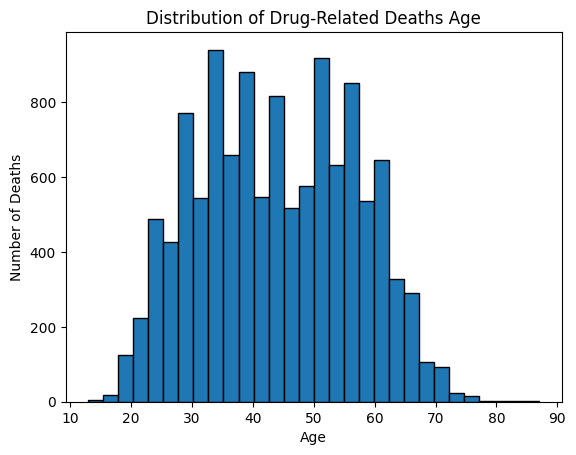

In [ ]:
plt.hist(data['Age'].dropna(), bins=30, edgecolor='black')  #Drop NaN values
plt.title('Distribution of Drug-Related Deaths Age')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.show()

Show all the variable names

In [ ]:
data.columns

Index(['Date', 'Date Type', 'Age', 'Sex', 'Race', 'Ethnicity',
       'Residence City', 'Residence County', 'Residence State', 'Injury City',
       'Injury County', 'Injury State', 'Injury Place',
       'Description of Injury', 'Death City', 'Death County', 'Death State',
       'Location', 'Location if Other', 'Cause of Death', 'Manner of Death',
       'Other Significant Conditions ', 'Heroin',
       'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl',
       'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine',
       'Other Opioid', 'Any Opioid', 'Other', 'ResidenceCityGeo',
       'InjuryCityGeo', 'DeathCityGeo'],
      dtype='object')

#Data Preprocessing

##Handling missing values

Update variable names

In [ ]:
original_columns = data.columns #Current variable names

new_columns = [col.replace(' ', '_') for col in original_columns] #Replace spaces with underscores

data.columns = new_columns #Assign new variable names to DataFrame

In [ ]:
data.columns

Index(['Date', 'Date_Type', 'Age', 'Sex', 'Race', 'Ethnicity',
       'Residence_City', 'Residence_County', 'Residence_State', 'Injury_City',
       'Injury_County', 'Injury_State', 'Injury_Place',
       'Description_of_Injury', 'Death_City', 'Death_County', 'Death_State',
       'Location', 'Location_if_Other', 'Cause_of_Death', 'Manner_of_Death',
       'Other_Significant_Conditions_', 'Heroin',
       'Heroin_death_certificate_(DC)', 'Cocaine', 'Fentanyl',
       'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine_(Not_Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate_NOS', 'Heroin/Morph/Codeine',
       'Other_Opioid', 'Any_Opioid', 'Other', 'ResidenceCityGeo',
       'InjuryCityGeo', 'DeathCityGeo'],
      dtype='object')

Age variable

In [ ]:
#Impute missing values with median
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)

<ipython-input-16-26a05e57e57d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(median_age, inplace=True)


In [ ]:
print(data['Age'].isnull().sum())

0


Sex variable

In [ ]:
#Impute missing values with the mode
mode_sex = data['Sex'].mode()[0]  #[0] Get the first mode
data['Sex'].fillna(mode_sex, inplace=True)

<ipython-input-18-cb490812460f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sex'].fillna(mode_sex, inplace=True)


In [ ]:
print(data['Sex'].isnull().sum())

0


Race variable

In [ ]:
#Impute missing values with the mode
mode_race = data['Race'].mode()[0]  #[0] Get the first mode
data['Race'].fillna(mode_race, inplace=True)

<ipython-input-20-ec1cc5d11e3f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Race'].fillna(mode_race, inplace=True)


In [ ]:
print(data['Race'].isnull().sum())

0


Injury Place

In [ ]:
#Impute missing values with the mode
mode_injury_place = data['Injury_Place'].mode()[0]  #[0] Get the first mode
data['Injury_Place'].fillna(mode_injury_place, inplace=True)

<ipython-input-22-9f98f0250703>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Injury_Place'].fillna(mode_injury_place, inplace=True)


In [ ]:
print(data['Injury_Place'].isnull().sum())

0


Description of Injury

In [ ]:
#Impute missing values with "Unknown"
data['Description_of_Injury'].fillna('Unknown', inplace=True)

<ipython-input-24-36698aa66da0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Description_of_Injury'].fillna('Unknown', inplace=True)


In [ ]:
print(data['Description_of_Injury'].isnull().sum())

0


Location variable

In [ ]:
#Impute missing values with the mode
mode_location = data['Location'].mode()[0]  #[0] Get the first mode
data['Location'].fillna(mode_location, inplace=True)

<ipython-input-26-74971ac32df8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Location'].fillna(mode_location, inplace=True)


In [ ]:
print(data['Location'].isnull().sum())

0


Manner of Death

In [ ]:
#Impute missing values with the mode
mode_man_death = data['Manner_of_Death'].mode()[0]  #[0] Get the first mode
data['Manner_of_Death'].fillna(mode_man_death, inplace=True)

<ipython-input-28-9adc7506d838>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Manner_of_Death'].fillna(mode_man_death, inplace=True)


In [ ]:
print(data['Manner_of_Death'].isnull().sum())

0


Check all missing values

In [ ]:
print(data.isnull().sum())

Date                                 0
Date_Type                            0
Age                                  0
Sex                                  0
Race                                 0
Ethnicity                         9416
Residence_City                     596
Residence_County                  1260
Residence_State                   1988
Injury_City                        178
Injury_County                     3334
Injury_State                      3029
Injury_Place                         0
Description_of_Injury                0
Death_City                        2784
Death_County                      3891
Death_State                       5108
Location                             0
Location_if_Other                10787
Cause_of_Death                       0
Manner_of_Death                      0
Other_Significant_Conditions_    10782
Heroin                            8403
Heroin_death_certificate_(DC)    11241
Cocaine                           7403
Fentanyl                 

##Handling outliers

In [ ]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

#Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)] #Remove outliers

Show outliers

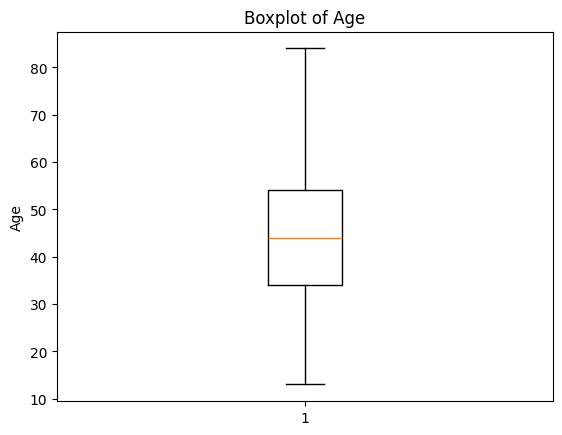

In [ ]:
plt.boxplot(data['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

##Encoding

Export dataset

In [ ]:
data.to_excel("data_clean_1.xlsx", index=False)

###Sex variable

Label encoding for Sex variable

In [ ]:
le_sex = LabelEncoder() #Create a LabelEncoder 'Sex'
data['Sex_encoded'] = le_sex.fit_transform(data['Sex'])

Count the number of females and males

In [ ]:
for i, category in enumerate(le_sex.classes_):
    count = data['Sex_encoded'].value_counts()[i]
    print(f"{category}: {i} - (Count: {count})")

Female: 0 - (Count: 3082)
Male: 1 - (Count: 8895)
Unknown: 2 - (Count: 2)
X: 3 - (Count: 1)


###Manner of Death variable

Label encoding for Manner of Death variable

In [ ]:
le_man_death = LabelEncoder() #Create a LabelEncoder 'Manner_of_Death'
data['Manner_of_Death_encoded'] = le_man_death.fit_transform(data['Manner_of_Death'])

Count the Manner of Death and their classes

In [ ]:
for i, category in enumerate(le_man_death.classes_):
    count = data['Manner_of_Death_encoded'].value_counts()[i]
    print(f"{category}: {i} - (Count: {count})")

ACCIDENT: 0 - (Count: 1)
Acciddent: 1 - (Count: 1)
Accident: 2 - (Count: 11950)
Natural: 3 - (Count: 1)
Pending: 4 - (Count: 14)
accident: 5 - (Count: 13)


In [ ]:
data.head(10)

,Date,Date_Type,Age,Sex,Race,Ethnicity,Residence_City,Residence_County,Residence_State,Injury_City,...,Opiate_NOS,Heroin/Morph/Codeine,Other_Opioid,Any_Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo,Sex_encoded,Manner_of_Death_encoded
0,05/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)",1,2
1,06/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,...,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)",1,2
2,03/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)",1,2
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)",0,2
4,01/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,...,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)",1,2
5,06/13/2017,Date reported,57.0,Male,White,NaN,BLANDFORD,HAMPDEN,MA,ENFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,"ENFIELD, CT\n(41.976501, -72.591985)","Enfield, CT\n(41.976501, -72.591985)",1,2
6,10/20/2015,Date reported,26.0,Male,White,NaN,DANBURY,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,Y,NaN,"DANBURY, CT\n(41.393666, -73.451539)","DANBURY, CT\n(41.393666, -73.451539)","Danbury, CT\n(41.393666, -73.451539)",1,2
7,02/02/2017,Date reported,64.0,Male,White,NaN,MILFORD,NEW HAVEN,CT,MILFORD,...,NaN,NaN,NaN,NaN,NaN,"MILFORD, CT\n(41.224276, -73.057564)","MILFORD, CT\n(41.224276, -73.057564)","Milford, CT\n(41.224276, -73.057564)",1,2
8,07/03/2018,Date of death,33.0,Male,White,NaN,NaN,NaN,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)","HARTFORD, CT\n(41.765775, -72.673356)","Hartford, CT\n(41.765775, -72.673356)",1,2
9,05/08/2013,Date of death,23.0,Male,White,NaN,BETHEL,FAIRFIELD,NaN,BETHEL,...,NaN,NaN,NaN,NaN,NaN,"BETHEL, CT\n(41.371727, -73.407448)","BETHEL, CT\n(41.371727, -73.407448)","Bethel, CT\n(41.371727, -73.407448)",1,2


Export dataset

In [ ]:
data.to_excel("data_clean_2.xlsx", index=False)

###Race variable

One-hot encoding for Race variable

In [ ]:
encode_race = pd.get_dummies(data['Race'], prefix='Race',dtype=int)

data = pd.concat([data, encode_race], axis=1) #Concatenate 'Race' variable to DataFrame

data = data.drop('Race', axis=1) #Drop the original 'Race' variable

In [ ]:
data.head(10)

,Date,Date_Type,Age,Sex,Ethnicity,Residence_City,Residence_County,Residence_State,Injury_City,Injury_County,...,Race_Other,Race_Other (Specify),Race_Other (Specify) Haitian,Race_Other (Specify) Puerto Rican,"Race_Other (Specify) portugese, Cape Verdean",Race_Other Asian,Race_Other Asian (Specify),Race_Unknown,Race_White,Race_white
0,05/29/2012,Date of death,37.0,Male,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,NaN,...,0,0,0,0,0,0,0,0,0,0
1,06/27/2012,Date of death,37.0,Male,NaN,NORWICH,NEW LONDON,NaN,NORWICH,NaN,...,0,0,0,0,0,0,0,0,1,0
2,03/24/2014,Date of death,28.0,Male,NaN,HEBRON,NaN,NaN,HEBRON,NaN,...,0,0,0,0,0,0,0,0,1,0
3,12/31/2014,Date of death,26.0,Female,NaN,BALTIC,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,01/16/2016,Date of death,41.0,Male,NaN,SHELTON,FAIRFIELD,CT,SHELTON,NaN,...,0,0,0,0,0,0,0,0,1,0
5,06/13/2017,Date reported,57.0,Male,NaN,BLANDFORD,HAMPDEN,MA,ENFIELD,HARTFORD,...,0,0,0,0,0,0,0,0,1,0
6,10/20/2015,Date reported,26.0,Male,NaN,DANBURY,FAIRFIELD,CT,DANBURY,NaN,...,0,0,0,0,0,0,0,0,1,0
7,02/02/2017,Date reported,64.0,Male,NaN,MILFORD,NEW HAVEN,CT,MILFORD,NEW HAVEN,...,0,0,0,0,0,0,0,0,1,0
8,07/03/2018,Date of death,33.0,Male,NaN,NaN,NaN,NaN,HARTFORD,HARTFORD,...,0,0,0,0,0,0,0,0,1,0
9,05/08/2013,Date of death,23.0,Male,NaN,BETHEL,FAIRFIELD,NaN,BETHEL,NaN,...,0,0,0,0,0,0,0,0,1,0


Count the number of race

In [ ]:
#Get a list of Race variables
race_columns = [col for col in data.columns if col.startswith('Race_')]

for column in race_columns: #Count occurrences for each Race
    race_count = data[column].sum()  #Summing the presence of that Race in the variable
    race_name = column.replace('Race_', '')  #Extract the Race name from the variable name
    print(f"Number of {race_name}: {race_count}")

Number of American Indian or Alaska Native: 1
Number of Asian: 2
Number of Asian Indian: 26
Number of Asian, Other: 24
Number of Asian/Indian: 5
Number of Black: 809
Number of Black or African American: 826
Number of Black or African American / American Indian Lenni Lenape: 1
Number of Chinese: 2
Number of Hawaiian: 1
Number of Korean: 1
Number of Native American, Other: 1
Number of Other: 52
Number of Other (Specify): 13
Number of Other (Specify) Haitian: 1
Number of Other (Specify) Puerto Rican: 1
Number of Other (Specify) portugese, Cape Verdean: 1
Number of Other Asian: 12
Number of Other Asian (Specify): 1
Number of Unknown: 62
Number of White: 10136
Number of white: 2


###Ethnicity variable

Drop Ethnicity variable

In [ ]:
data = data.drop('Ethnicity', axis=1)

In [ ]:
data.tail(10)

,Date,Date_Type,Age,Sex,Residence_City,Residence_County,Residence_State,Injury_City,Injury_County,Injury_State,...,Race_Other,Race_Other (Specify),Race_Other (Specify) Haitian,Race_Other (Specify) Puerto Rican,"Race_Other (Specify) portugese, Cape Verdean",Race_Other Asian,Race_Other Asian (Specify),Race_Unknown,Race_White,Race_white
11971,05/08/2023,Date of death,50.0,Male,EAST HAVEN,NEW HAVEN,CT,EAST HAVEN,NEW HAVEN,CT,...,0,0,0,0,0,0,0,0,1,0
11972,04/30/2023,Date of death,61.0,Male,BRISTOL,HARTFORD,CT,SOUTHINGTON,HARTFORD,CT,...,0,0,0,0,0,0,0,0,1,0
11973,10/15/2023,Date of death,36.0,Male,BRIDGEPORT,FAIRFIELD,CT,BRIDGEPORT,FAIRFIELD,CT,...,0,0,0,0,0,0,0,0,1,0
11974,04/05/2023,Date of death,30.0,Male,WATERBURY,NEW HAVEN,CT,WATERBURY,NEW HAVEN,CT,...,0,0,0,0,0,0,0,0,1,0
11975,07/04/2023,Date of death,30.0,Male,DANBURY,FAIRFIELD,CT,DANBURY,FAIRFIELD,CT,...,0,0,0,0,0,0,0,0,1,0
11976,02/28/2023,Date of death,58.0,Female,NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,NEW HAVEN,CT,...,0,0,0,0,0,0,0,0,1,0
11977,08/23/2023,Date of death,23.0,Male,NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,NEW HAVEN,CT,...,0,0,0,0,0,0,0,0,1,0
11978,01/30/2023,Date of death,46.0,Male,DANBURY,FAIRFIELD,CT,DANBURY,FAIRFIELD,NaN,...,0,0,0,0,0,0,0,0,1,0
11979,09/25/2023,Date of death,44.0,Male,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,CT,...,0,0,0,0,0,0,0,0,1,0
11980,09/16/2023,Date of death,42.0,Male,BRISTOL,HARTFORD,CT,BRISTOL,HARTFORD,NaN,...,0,0,0,0,0,0,0,0,1,0


###Location variable

One-hot encoding for Location variable

In [ ]:
encode_location = pd.get_dummies(data['Location'], prefix='Location',dtype=int)

data = pd.concat([data, encode_location], axis=1) #Concatenate Location variable to DataFrame

data = data.drop('Location', axis=1) #Drop the original 'Location' variable

In [ ]:
data.tail(10)

,Date,Date_Type,Age,Sex,Residence_City,Residence_County,Residence_State,Injury_City,Injury_County,Injury_State,...,Location_Hospice Facility,Location_Hospital,Location_Hospital - Dead On Arrival,Location_Hospital - ER/Outpatient,Location_Hospital - Inpatient,Location_Nursing Home,Location_Other,Location_Other (Specify),Location_Residence,Location_Shelter
11971,05/08/2023,Date of death,50.0,Male,EAST HAVEN,NEW HAVEN,CT,EAST HAVEN,NEW HAVEN,CT,...,0,0,0,0,0,0,0,0,1,0
11972,04/30/2023,Date of death,61.0,Male,BRISTOL,HARTFORD,CT,SOUTHINGTON,HARTFORD,CT,...,0,0,0,0,0,0,0,0,1,0
11973,10/15/2023,Date of death,36.0,Male,BRIDGEPORT,FAIRFIELD,CT,BRIDGEPORT,FAIRFIELD,CT,...,0,0,0,0,0,0,0,0,1,0
11974,04/05/2023,Date of death,30.0,Male,WATERBURY,NEW HAVEN,CT,WATERBURY,NEW HAVEN,CT,...,0,0,0,0,0,0,0,0,1,0
11975,07/04/2023,Date of death,30.0,Male,DANBURY,FAIRFIELD,CT,DANBURY,FAIRFIELD,CT,...,0,0,0,0,0,0,0,0,1,0
11976,02/28/2023,Date of death,58.0,Female,NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,NEW HAVEN,CT,...,0,0,0,0,0,0,0,0,1,0
11977,08/23/2023,Date of death,23.0,Male,NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,NEW HAVEN,CT,...,0,0,0,0,0,0,0,0,1,0
11978,01/30/2023,Date of death,46.0,Male,DANBURY,FAIRFIELD,CT,DANBURY,FAIRFIELD,NaN,...,0,0,0,0,0,0,0,0,1,0
11979,09/25/2023,Date of death,44.0,Male,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,CT,...,0,0,0,0,0,0,0,0,1,0
11980,09/16/2023,Date of death,42.0,Male,BRISTOL,HARTFORD,CT,BRISTOL,HARTFORD,NaN,...,0,0,0,0,0,0,0,0,1,0


Number of Deaths depending on the Location of Death



In [ ]:
#Get encoded 'Location' variable
location_columns = [col for col in data.columns if col.startswith('Location_')]

#Count occurrences for each encoded 'Location' variable
for column in location_columns:
    counts = data[column][data[column] == 1].sum() #Where the value is true (==1)
    print(f"Numbers of Deaths where '{column}':\n{counts}\n")

Numbers of Deaths where 'Location_if_Other':
0

Numbers of Deaths where 'Location_Assisted Living':
2

Numbers of Deaths where 'Location_Convalescent Home':
3

Numbers of Deaths where 'Location_Decedent's Home':
52

Numbers of Deaths where 'Location_Decedent’s Home':
776

Numbers of Deaths where 'Location_Hiospital':
1

Numbers of Deaths where 'Location_Hospice':
3

Numbers of Deaths where 'Location_Hospice Facility':
1

Numbers of Deaths where 'Location_Hospital':
2336

Numbers of Deaths where 'Location_Hospital - Dead On Arrival':
81

Numbers of Deaths where 'Location_Hospital - ER/Outpatient':
401

Numbers of Deaths where 'Location_Hospital - Inpatient':
246

Numbers of Deaths where 'Location_Nursing Home':
9

Numbers of Deaths where 'Location_Other':
1559

Numbers of Deaths where 'Location_Other (Specify)':
362

Numbers of Deaths where 'Location_Residence':
6147

Numbers of Deaths where 'Location_Shelter':
1



Export dataset

In [ ]:
data.to_excel("data_clean_3.xlsx", index=False)

###Date variable

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
print(data[['Date']].info())

<class 'pandas.core.frame.DataFrame'>
Index: 11980 entries, 0 to 11980
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11980 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 187.2 KB
None


In [ ]:
data.head(10)

,Date,Date_Type,Age,Sex,Residence_City,Residence_County,Residence_State,Injury_City,Injury_County,Injury_State,...,Location_Hospice Facility,Location_Hospital,Location_Hospital - Dead On Arrival,Location_Hospital - ER/Outpatient,Location_Hospital - Inpatient,Location_Nursing Home,Location_Other,Location_Other (Specify),Location_Residence,Location_Shelter
0,2012-05-29,Date of death,37.0,Male,STAMFORD,FAIRFIELD,NaN,STAMFORD,NaN,CT,...,0,0,0,0,0,0,0,0,1,0
1,2012-06-27,Date of death,37.0,Male,NORWICH,NEW LONDON,NaN,NORWICH,NaN,CT,...,0,1,0,0,0,0,0,0,0,0
2,2014-03-24,Date of death,28.0,Male,HEBRON,NaN,NaN,HEBRON,NaN,CT,...,0,1,0,0,0,0,0,0,0,0
3,2014-12-31,Date of death,26.0,Female,BALTIC,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,2016-01-16,Date of death,41.0,Male,SHELTON,FAIRFIELD,CT,SHELTON,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
5,2017-06-13,Date reported,57.0,Male,BLANDFORD,HAMPDEN,MA,ENFIELD,HARTFORD,CT,...,0,0,0,0,0,0,1,0,0,0
6,2015-10-20,Date reported,26.0,Male,DANBURY,FAIRFIELD,CT,DANBURY,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
7,2017-02-02,Date reported,64.0,Male,MILFORD,NEW HAVEN,CT,MILFORD,NEW HAVEN,CT,...,0,0,0,0,0,0,0,0,1,0
8,2018-07-03,Date of death,33.0,Male,NaN,NaN,NaN,HARTFORD,HARTFORD,NaN,...,0,0,0,0,0,0,1,0,0,0
9,2013-05-08,Date of death,23.0,Male,BETHEL,FAIRFIELD,NaN,BETHEL,NaN,CT,...,0,0,0,0,0,0,0,0,1,0


###Date Type variable

Label encoding for Date Type variable

In [ ]:
le_date_type = LabelEncoder() #Create a LabelEncoder 'Date_Type'
data['Date_Type_encoded'] = le_date_type.fit_transform(data['Date_Type'])

Count the Date Type and their classes

In [ ]:
for i, category in enumerate(le_date_type.classes_):
    count = data['Date_Type_encoded'].value_counts()[i]
    print(f"{category}: {i} - (Count: {count})")

Date of death: 0 - (Count: 10213)
Date reported: 1 - (Count: 1767)


###Description of Injury variable

Frequency encoding for Description of Injury variable

In [ ]:
#Calculate frequency of each category
injury_freq = data['Description_of_Injury'].value_counts(normalize=True)

#Create a dictionary mapping categories to frequencies
injury_freq_map = injury_freq.to_dict()

#Apply frequency encoding to the 'Description_of_Injury' column
data['Description_of_Injury_encoded'] = data['Description_of_Injury'].map(injury_freq_map)

In [ ]:
data.tail(10)

,Date,Date_Type,Age,Sex,Residence_City,Residence_County,Residence_State,Injury_City,Injury_County,Injury_State,...,Location_Hospital - Dead On Arrival,Location_Hospital - ER/Outpatient,Location_Hospital - Inpatient,Location_Nursing Home,Location_Other,Location_Other (Specify),Location_Residence,Location_Shelter,Date_Type_encoded,Description_of_Injury_encoded
11971,2023-05-08,Date of death,50.0,Male,EAST HAVEN,NEW HAVEN,CT,EAST HAVEN,NEW HAVEN,CT,...,0,0,0,0,0,0,1,0,0,0.001336
11972,2023-04-30,Date of death,61.0,Male,BRISTOL,HARTFORD,CT,SOUTHINGTON,HARTFORD,CT,...,0,0,0,0,0,0,1,0,0,0.269866
11973,2023-10-15,Date of death,36.0,Male,BRIDGEPORT,FAIRFIELD,CT,BRIDGEPORT,FAIRFIELD,CT,...,0,0,0,0,0,0,1,0,0,0.269866
11974,2023-04-05,Date of death,30.0,Male,WATERBURY,NEW HAVEN,CT,WATERBURY,NEW HAVEN,CT,...,0,0,0,0,0,0,1,0,0,0.000751
11975,2023-07-04,Date of death,30.0,Male,DANBURY,FAIRFIELD,CT,DANBURY,FAIRFIELD,CT,...,0,0,0,0,0,0,1,0,0,0.083222
11976,2023-02-28,Date of death,58.0,Female,NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,NEW HAVEN,CT,...,0,0,0,0,0,0,1,0,0,0.014942
11977,2023-08-23,Date of death,23.0,Male,NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,NEW HAVEN,CT,...,0,0,0,0,0,0,1,0,0,0.086728
11978,2023-01-30,Date of death,46.0,Male,DANBURY,FAIRFIELD,CT,DANBURY,FAIRFIELD,NaN,...,0,0,0,0,0,0,1,0,0,0.086728
11979,2023-09-25,Date of death,44.0,Male,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,CT,...,0,0,0,0,0,0,1,0,0,0.014942
11980,2023-09-16,Date of death,42.0,Male,BRISTOL,HARTFORD,CT,BRISTOL,HARTFORD,NaN,...,0,0,0,0,0,0,1,0,0,0.086728


Number of injuries based on the description in desc order

In [ ]:
#Count the encoded number of injuries and their classes
injury_counts = data['Description_of_Injury_encoded'].value_counts()

#Show injury description, encoded value and injury counts
for injury_description, encoded_value in injury_freq_map.items():
  if encoded_value >= 0.002: #Filter condition
    count = injury_counts.get(encoded_value, 0)
    print(f"Number of '{injury_description}' is {count}")

Number of 'Substance Abuse' is 3233
Number of 'Drug Use' is 1298
Number of 'Substance abuse' is 1212
Number of 'Substance use' is 1039
Number of 'Substance Use' is 997
Number of 'Unknown' is 812
Number of 'Drug abuse' is 590
Number of 'Ingestion' is 374
Number of 'substance abuse' is 303
Number of 'Used Drugs' is 179
Number of 'Injection' is 161
Number of 'Inhalation' is 114
Number of 'Acute and chronic substance use disorder' is 93
Number of 'SUBSTANCE ABUSE' is 81
Number of 'Substance abuse.' is 69
Number of 'drug use' is 62
Number of 'Substance Use Disorder' is 53
Number of 'Used Drugs and Alcohol' is 43
Number of 'Used illicit drugs' is 41
Number of 'Drug use' is 35
Number of 'Took Medications' is 34
Number of 'Acute and chronic substance abuse' is 28
Number of 'Used fentanyl' is 27
Number of 'Used Heroin' is 26
Number of 'Misuse of Medications' is 25


Export dataset

In [ ]:
data.to_excel("data_clean_4.xlsx", index=False)

###Drugs variables

In [ ]:
drug_columns = [
    'Heroin', 'Heroin_death_certificate_(DC)', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
    'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine_(Not_Heroin)',
    'Xylazine', 'Gabapentin', 'Opiate_NOS', 'Heroin/Morph/Codeine', 'Other_Opioid', 'Any_Opioid'
    ]

for column in drug_columns:
    data[column].fillna('N', inplace=True) #Fill empty values with a placeholder 'N'
    data[column + '_encoded'] = data[column].map({'Y': 1, 'N': 0}) #Apply mapping
    data = data.drop(column, axis=1) #Drop original column

<ipython-input-58-86b24d990547>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna('N', inplace=True) #Fill empty values with a placeholder 'N'
<ipython-input-58-86b24d990547>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [ ]:
drug_columns_encoded = [col for col in data.columns if col.endswith('_encoded') and col.startswith(('Heroin', 'Heroin_death_certificate_(DC)', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
    'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine_(Not_Heroin)',
    'Xylazine', 'Gabapentin', 'Opiate_NOS', 'Heroin/Morph/Codeine', 'Other_Opioid', 'Any_Opioid'))]  #List of encoded drug variables

for column in drug_columns_encoded:
    drug_count = data[column][data[column] == 1].sum()
    print(f"Number of {column.replace('_encoded', '')} cases: {drug_count}")

Number of Heroin cases: 3578
Number of Heroin_death_certificate_(DC) cases: 740
Number of Cocaine cases: 4578
Number of Fentanyl cases: 8047.0
Number of Fentanyl_Analogue cases: 974
Number of Oxycodone cases: 1015
Number of Oxymorphone cases: 162
Number of Ethanol cases: 3200.0
Number of Hydrocodone cases: 169
Number of Benzodiazepine cases: 2717
Number of Methadone cases: 1078
Number of Meth/Amphetamine cases: 127
Number of Amphet cases: 431
Number of Tramad cases: 302
Number of Hydromorphone cases: 77
Number of Morphine_(Not_Heroin) cases: 56.0
Number of Xylazine cases: 1078
Number of Gabapentin cases: 468.0
Number of Opiate_NOS cases: 127
Number of Heroin/Morph/Codeine cases: 2157.0
Number of Other_Opioid cases: 90.0
Number of Any_Opioid cases: 8828


In [ ]:
data.head(10)

,Date,Date_Type,Age,Sex,Residence_City,Residence_County,Residence_State,Injury_City,Injury_County,Injury_State,...,Amphet_encoded,Tramad_encoded,Hydromorphone_encoded,Morphine_(Not_Heroin)_encoded,Xylazine_encoded,Gabapentin_encoded,Opiate_NOS_encoded,Heroin/Morph/Codeine_encoded,Other_Opioid_encoded,Any_Opioid_encoded
0,2012-05-29,Date of death,37.0,Male,STAMFORD,FAIRFIELD,NaN,STAMFORD,NaN,CT,...,0,0,0,0.0,0,0.0,0,0.0,0.0,0
1,2012-06-27,Date of death,37.0,Male,NORWICH,NEW LONDON,NaN,NORWICH,NaN,CT,...,0,0,0,0.0,0,0.0,0,0.0,0.0,0
2,2014-03-24,Date of death,28.0,Male,HEBRON,NaN,NaN,HEBRON,NaN,CT,...,0,0,0,0.0,0,0.0,0,0.0,0.0,0
3,2014-12-31,Date of death,26.0,Female,BALTIC,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0.0,0,0.0,0,0.0,0.0,0
4,2016-01-16,Date of death,41.0,Male,SHELTON,FAIRFIELD,CT,SHELTON,NaN,NaN,...,0,0,0,0.0,0,0.0,0,0.0,0.0,1
5,2017-06-13,Date reported,57.0,Male,BLANDFORD,HAMPDEN,MA,ENFIELD,HARTFORD,CT,...,0,0,0,0.0,0,0.0,0,0.0,0.0,0
6,2015-10-20,Date reported,26.0,Male,DANBURY,FAIRFIELD,CT,DANBURY,NaN,NaN,...,0,0,0,0.0,0,0.0,0,0.0,0.0,1
7,2017-02-02,Date reported,64.0,Male,MILFORD,NEW HAVEN,CT,MILFORD,NEW HAVEN,CT,...,0,0,0,0.0,0,0.0,0,0.0,0.0,0
8,2018-07-03,Date of death,33.0,Male,NaN,NaN,NaN,HARTFORD,HARTFORD,NaN,...,0,0,0,0.0,0,0.0,0,0.0,0.0,0
9,2013-05-08,Date of death,23.0,Male,BETHEL,FAIRFIELD,NaN,BETHEL,NaN,CT,...,0,0,0,0.0,0,0.0,0,0.0,0.0,0


Export dataset

In [ ]:
data.to_excel("data_clean_5.xlsx", index=False)

###Residence/Injury/Death etc variables

In [ ]:
columns_to_drop = ['Residence_City', 'Residence_County', 'Residence_State',
                  'Injury_City', 'Injury_County', 'Injury_State',
                  'Death_City', 'Death_County', 'Death_State',
                  'Location_if_Other', 'Other_Significant_Conditions_', 'Other']

data = data.drop(columns=columns_to_drop)

In [ ]:
data.head(10)

,Date,Date_Type,Age,Sex,Injury_Place,Description_of_Injury,Cause_of_Death,Manner_of_Death,ResidenceCityGeo,InjuryCityGeo,...,Amphet_encoded,Tramad_encoded,Hydromorphone_encoded,Morphine_(Not_Heroin)_encoded,Xylazine_encoded,Gabapentin_encoded,Opiate_NOS_encoded,Heroin/Morph/Codeine_encoded,Other_Opioid_encoded,Any_Opioid_encoded
0,2012-05-29,Date of death,37.0,Male,Residence,Used Cocaine,Cocaine Toxicity,Accident,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)",...,0,0,0,0.0,0,0.0,0,0.0,0.0,0
1,2012-06-27,Date of death,37.0,Male,Residence,Drug Use,Heroin Toxicity,Accident,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)",...,0,0,0,0.0,0,0.0,0,0.0,0.0,0
2,2014-03-24,Date of death,28.0,Male,Residence,Drug Use,Heroin Intoxication,Accident,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)",...,0,0,0,0.0,0,0.0,0,0.0,0.0,0
3,2014-12-31,Date of death,26.0,Female,Residence,Unknown,Acute Heroin Intoxication,Accident,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)",...,0,0,0,0.0,0,0.0,0,0.0,0.0,0
4,2016-01-16,Date of death,41.0,Male,Residence,Drug Use,Acute Fentanyl Intoxication,Accident,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)",...,0,0,0,0.0,0,0.0,0,0.0,0.0,1
5,2017-06-13,Date reported,57.0,Male,In Vehicle,Drug abuse,Acute Intoxication Cocaine Toxicity,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)",...,0,0,0,0.0,0,0.0,0,0.0,0.0,0
6,2015-10-20,Date reported,26.0,Male,Residence,Unknown,Acute Opioid Intoxication,Accident,"DANBURY, CT\n(41.393666, -73.451539)","DANBURY, CT\n(41.393666, -73.451539)",...,0,0,0,0.0,0,0.0,0,0.0,0.0,1
7,2017-02-02,Date reported,64.0,Male,Residence,Ingestion,Acute Oxycodone Intoxication,Accident,"MILFORD, CT\n(41.224276, -73.057564)","MILFORD, CT\n(41.224276, -73.057564)",...,0,0,0,0.0,0,0.0,0,0.0,0.0,0
8,2018-07-03,Date of death,33.0,Male,Building,Drug Use,Acute Cocaine Intoxication,Accident,"CT\n(41.575155, -72.738288)","HARTFORD, CT\n(41.765775, -72.673356)",...,0,0,0,0.0,0,0.0,0,0.0,0.0,0
9,2013-05-08,Date of death,23.0,Male,Residence,Inhalation,Heroin Intoxication,Accident,"BETHEL, CT\n(41.371727, -73.407448)","BETHEL, CT\n(41.371727, -73.407448)",...,0,0,0,0.0,0,0.0,0,0.0,0.0,0


###Injury Place variable

In [ ]:
unique_injury_places = data['Injury_Place'].nunique()
print(f"Number of injury places: {unique_injury_places}")

Number of injury places: 99


Frequency encoding for Injury Place variable

In [ ]:
# Calculate frequency of each category
injury_place_freq = data['Injury_Place'].value_counts(normalize=True)

# Create a dictionary mapping categories to frequencies
injury_place_freq_map = injury_place_freq.to_dict()

# Apply frequency encoding to the 'Description_of_Injury' column
data['Injury_Place_encoded'] = data['Injury_Place'].map(injury_place_freq_map)

Number of injuries based on the place in desc order

In [ ]:
# Count the encoded number of injury places and their classes
injury_place_counts = data['Injury_Place_encoded'].value_counts()

#Show injury place, encoded value and injury counts
for injury_place, encoded_value in injury_place_freq_map.items():
  if encoded_value >= 0.002: #Filter condition
    count = injury_place_counts.get(encoded_value, 0)
    print(f"Number of injuries at '{injury_place}' is {count}")

Number of injuries at 'Residence' is 6545
Number of injuries at 'Home' is 1781
Number of injuries at 'Other' is 775
Number of injuries at 'Hotel or Motel' is 491
Number of injuries at 'Other Specified Place' is 368
Number of injuries at 'Unknown' is 308
Number of injuries at 'Residential Building' is 286
Number of injuries at 'In Vehicle' is 149
Number of injuries at 'Unspecified Place' is 144
Number of injuries at 'House' is 134
Number of injuries at 'Apartment' is 109
Number of injuries at 'Other, Other Outdoor Area' is 90
Number of injuries at 'Automobile' is 76
Number of injuries at 'Parking Lot' is 61
Number of injuries at 'Other, Residential Institution' is 57
Number of injuries at 'Halfway House' is 52
Number of injuries at 'Other building' is 30
Number of injuries at 'Restaurant' is 29
Number of injuries at 'Other indoor Area' is 24


Export dataset

In [ ]:
data.to_excel("data_clean_6.xlsx", index=False)

###Residence City Geo variable

In [ ]:
data[['ResidenceCityGeo']].head(10) #Show top 10 records

,ResidenceCityGeo
0,"STAMFORD, CT\n(41.051924, -73.539475)"
1,"NORWICH, CT\n(41.524304, -72.075821)"
2,"HEBRON, CT\n(41.658069, -72.366324)"
3,"BALTIC, CT\n(41.617221, -72.085031)"
4,"SHELTON, CT\n(41.316843, -73.092968)"
5,NaN
6,"DANBURY, CT\n(41.393666, -73.451539)"
7,"MILFORD, CT\n(41.224276, -73.057564)"
8,"CT\n(41.575155, -72.738288)"
9,"BETHEL, CT\n(41.371727, -73.407448)"


In [ ]:
print(data['ResidenceCityGeo'].dtype) #Check data type

object


In [ ]:
data['ResidenceCityGeo'] = data['ResidenceCityGeo'].str.split('\n', n=1).str[1] #Remove anything before '\n'

data['ResidenceCityGeo'] = data['ResidenceCityGeo'].str.replace(r'[\(\)]', '', regex=True) #Remove parantheses '()'

#Split into latitude and longitude
data[['ResidenceCityGeo_Lat', 'ResidenceCityGeo_Long']] = data['ResidenceCityGeo'].str.split(', ', expand=True)

#Convert to numerical values
data['ResidenceCityGeo_Lat'] = pd.to_numeric(data['ResidenceCityGeo_Lat'], errors='coerce')
data['ResidenceCityGeo_Long'] = pd.to_numeric(data['ResidenceCityGeo_Long'], errors='coerce')

In [ ]:
data.head(10)

,Date,Date_Type,Age,Sex,Injury_Place,Description_of_Injury,Cause_of_Death,Manner_of_Death,ResidenceCityGeo,InjuryCityGeo,...,Morphine_(Not_Heroin)_encoded,Xylazine_encoded,Gabapentin_encoded,Opiate_NOS_encoded,Heroin/Morph/Codeine_encoded,Other_Opioid_encoded,Any_Opioid_encoded,Injury_Place_encoded,ResidenceCityGeo_Lat,ResidenceCityGeo_Long
0,2012-05-29,Date of death,37.0,Male,Residence,Used Cocaine,Cocaine Toxicity,Accident,"41.051924, -73.539475","STAMFORD, CT\n(41.051924, -73.539475)",...,0.0,0,0.0,0,0.0,0.0,0,0.546327,41.051924,-73.539475
1,2012-06-27,Date of death,37.0,Male,Residence,Drug Use,Heroin Toxicity,Accident,"41.524304, -72.075821","NORWICH, CT\n(41.524304, -72.075821)",...,0.0,0,0.0,0,0.0,0.0,0,0.546327,41.524304,-72.075821
2,2014-03-24,Date of death,28.0,Male,Residence,Drug Use,Heroin Intoxication,Accident,"41.658069, -72.366324","HEBRON, CT\n(41.658069, -72.366324)",...,0.0,0,0.0,0,0.0,0.0,0,0.546327,41.658069,-72.366324
3,2014-12-31,Date of death,26.0,Female,Residence,Unknown,Acute Heroin Intoxication,Accident,"41.617221, -72.085031","CT\n(41.575155, -72.738288)",...,0.0,0,0.0,0,0.0,0.0,0,0.546327,41.617221,-72.085031
4,2016-01-16,Date of death,41.0,Male,Residence,Drug Use,Acute Fentanyl Intoxication,Accident,"41.316843, -73.092968","SHELTON, CT\n(41.316843, -73.092968)",...,0.0,0,0.0,0,0.0,0.0,1,0.546327,41.316843,-73.092968
5,2017-06-13,Date reported,57.0,Male,In Vehicle,Drug abuse,Acute Intoxication Cocaine Toxicity,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)",...,0.0,0,0.0,0,0.0,0.0,0,0.012437,NaN,NaN
6,2015-10-20,Date reported,26.0,Male,Residence,Unknown,Acute Opioid Intoxication,Accident,"41.393666, -73.451539","DANBURY, CT\n(41.393666, -73.451539)",...,0.0,0,0.0,0,0.0,0.0,1,0.546327,41.393666,-73.451539
7,2017-02-02,Date reported,64.0,Male,Residence,Ingestion,Acute Oxycodone Intoxication,Accident,"41.224276, -73.057564","MILFORD, CT\n(41.224276, -73.057564)",...,0.0,0,0.0,0,0.0,0.0,0,0.546327,41.224276,-73.057564
8,2018-07-03,Date of death,33.0,Male,Building,Drug Use,Acute Cocaine Intoxication,Accident,"41.575155, -72.738288","HARTFORD, CT\n(41.765775, -72.673356)",...,0.0,0,0.0,0,0.0,0.0,0,0.001336,41.575155,-72.738288
9,2013-05-08,Date of death,23.0,Male,Residence,Inhalation,Heroin Intoxication,Accident,"41.371727, -73.407448","BETHEL, CT\n(41.371727, -73.407448)",...,0.0,0,0.0,0,0.0,0.0,0,0.546327,41.371727,-73.407448


In [ ]:
print(data['ResidenceCityGeo_Lat'].dtype) #Check data type

float64


In [ ]:
print(data['ResidenceCityGeo_Lat'].dtype) #Check data type

float64


In [ ]:
#Replace empty cells with 0
data['ResidenceCityGeo_Lat'].fillna(0, inplace=True)
data['ResidenceCityGeo_Long'].fillna(0, inplace=True)

<ipython-input-75-c0e98891b413>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ResidenceCityGeo_Lat'].fillna(0, inplace=True)
<ipython-input-75-c0e98891b413>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
data = data.drop('ResidenceCityGeo', axis=1) #Drop original column

###Injury City Geo variable

In [ ]:
data[['InjuryCityGeo']].head(10) #Show top 10 records

,InjuryCityGeo
0,"STAMFORD, CT\n(41.051924, -73.539475)"
1,"NORWICH, CT\n(41.524304, -72.075821)"
2,"HEBRON, CT\n(41.658069, -72.366324)"
3,"CT\n(41.575155, -72.738288)"
4,"SHELTON, CT\n(41.316843, -73.092968)"
5,"ENFIELD, CT\n(41.976501, -72.591985)"
6,"DANBURY, CT\n(41.393666, -73.451539)"
7,"MILFORD, CT\n(41.224276, -73.057564)"
8,"HARTFORD, CT\n(41.765775, -72.673356)"
9,"BETHEL, CT\n(41.371727, -73.407448)"


In [ ]:
print(data['InjuryCityGeo'].dtype) #Check data type

object


In [ ]:
data['InjuryCityGeo'] = data['InjuryCityGeo'].str.split('\n', n=1).str[1] #Remove anything before '\n'

data['InjuryCityGeo'] = data['InjuryCityGeo'].str.replace(r'[\(\)]', '', regex=True) #Remove parantheses '()'

#Split into latitude and longitude
data[['InjuryCityGeo_Lat', 'InjuryCityGeo_Long']] = data['InjuryCityGeo'].str.split(', ', expand=True)

#Convert to numerical values
data['InjuryCityGeo_Lat'] = pd.to_numeric(data['InjuryCityGeo_Lat'], errors='coerce')
data['InjuryCityGeo_Long'] = pd.to_numeric(data['InjuryCityGeo_Long'], errors='coerce')

#Replace empty cells with 0
data['InjuryCityGeo_Lat'].fillna(0, inplace=True)
data['InjuryCityGeo_Long'].fillna(0, inplace=True)

<ipython-input-79-5717f8f21af8>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['InjuryCityGeo_Lat'].fillna(0, inplace=True)
<ipython-input-79-5717f8f21af8>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
data.head(10)

,Date,Date_Type,Age,Sex,Injury_Place,Description_of_Injury,Cause_of_Death,Manner_of_Death,InjuryCityGeo,DeathCityGeo,...,Gabapentin_encoded,Opiate_NOS_encoded,Heroin/Morph/Codeine_encoded,Other_Opioid_encoded,Any_Opioid_encoded,Injury_Place_encoded,ResidenceCityGeo_Lat,ResidenceCityGeo_Long,InjuryCityGeo_Lat,InjuryCityGeo_Long
0,2012-05-29,Date of death,37.0,Male,Residence,Used Cocaine,Cocaine Toxicity,Accident,"41.051924, -73.539475","CT\n(41.575155, -72.738288)",...,0.0,0,0.0,0.0,0,0.546327,41.051924,-73.539475,41.051924,-73.539475
1,2012-06-27,Date of death,37.0,Male,Residence,Drug Use,Heroin Toxicity,Accident,"41.524304, -72.075821","Norwich, CT\n(41.524304, -72.075821)",...,0.0,0,0.0,0.0,0,0.546327,41.524304,-72.075821,41.524304,-72.075821
2,2014-03-24,Date of death,28.0,Male,Residence,Drug Use,Heroin Intoxication,Accident,"41.658069, -72.366324","Marlborough, CT\n(41.632043, -72.461309)",...,0.0,0,0.0,0.0,0,0.546327,41.658069,-72.366324,41.658069,-72.366324
3,2014-12-31,Date of death,26.0,Female,Residence,Unknown,Acute Heroin Intoxication,Accident,"41.575155, -72.738288","Baltic, CT\n(41.617221, -72.085031)",...,0.0,0,0.0,0.0,0,0.546327,41.617221,-72.085031,41.575155,-72.738288
4,2016-01-16,Date of death,41.0,Male,Residence,Drug Use,Acute Fentanyl Intoxication,Accident,"41.316843, -73.092968","Bridgeport, CT\n(41.179195, -73.189476)",...,0.0,0,0.0,0.0,1,0.546327,41.316843,-73.092968,41.316843,-73.092968
5,2017-06-13,Date reported,57.0,Male,In Vehicle,Drug abuse,Acute Intoxication Cocaine Toxicity,Accident,"41.976501, -72.591985","Enfield, CT\n(41.976501, -72.591985)",...,0.0,0,0.0,0.0,0,0.012437,0.000000,0.000000,41.976501,-72.591985
6,2015-10-20,Date reported,26.0,Male,Residence,Unknown,Acute Opioid Intoxication,Accident,"41.393666, -73.451539","Danbury, CT\n(41.393666, -73.451539)",...,0.0,0,0.0,0.0,1,0.546327,41.393666,-73.451539,41.393666,-73.451539
7,2017-02-02,Date reported,64.0,Male,Residence,Ingestion,Acute Oxycodone Intoxication,Accident,"41.224276, -73.057564","Milford, CT\n(41.224276, -73.057564)",...,0.0,0,0.0,0.0,0,0.546327,41.224276,-73.057564,41.224276,-73.057564
8,2018-07-03,Date of death,33.0,Male,Building,Drug Use,Acute Cocaine Intoxication,Accident,"41.765775, -72.673356","Hartford, CT\n(41.765775, -72.673356)",...,0.0,0,0.0,0.0,0,0.001336,41.575155,-72.738288,41.765775,-72.673356
9,2013-05-08,Date of death,23.0,Male,Residence,Inhalation,Heroin Intoxication,Accident,"41.371727, -73.407448","Bethel, CT\n(41.371727, -73.407448)",...,0.0,0,0.0,0.0,0,0.546327,41.371727,-73.407448,41.371727,-73.407448


In [ ]:
print(data['InjuryCityGeo_Lat'].dtype) #Check data type

float64


In [ ]:
print(data['InjuryCityGeo_Lat'].dtype) #Check data type

float64


In [ ]:
data = data.drop('InjuryCityGeo', axis=1) #Drop original column

###Death City Geo variable

In [ ]:
data[['DeathCityGeo']].head(10) #Show top 10 records

,DeathCityGeo
0,"CT\n(41.575155, -72.738288)"
1,"Norwich, CT\n(41.524304, -72.075821)"
2,"Marlborough, CT\n(41.632043, -72.461309)"
3,"Baltic, CT\n(41.617221, -72.085031)"
4,"Bridgeport, CT\n(41.179195, -73.189476)"
5,"Enfield, CT\n(41.976501, -72.591985)"
6,"Danbury, CT\n(41.393666, -73.451539)"
7,"Milford, CT\n(41.224276, -73.057564)"
8,"Hartford, CT\n(41.765775, -72.673356)"
9,"Bethel, CT\n(41.371727, -73.407448)"


In [ ]:
print(data['DeathCityGeo'].dtype) #Check data type

object


In [ ]:
data['DeathCityGeo'] = data['DeathCityGeo'].str.split('\n', n=1).str[1] #Remove anything before '\n'

data['DeathCityGeo'] = data['DeathCityGeo'].str.replace(r'[\(\)]', '', regex=True) #Remove parantheses '()'

#Split into latitude and longitude
data[['DeathCityGeo_Lat', 'DeathCityGeo_Long']] = data['DeathCityGeo'].str.split(', ', expand=True)

#Convert to numerical values
data['DeathCityGeo_Lat'] = pd.to_numeric(data['DeathCityGeo_Lat'], errors='coerce')
data['DeathCityGeo_Long'] = pd.to_numeric(data['DeathCityGeo_Long'], errors='coerce')

#Replace empty cells with 0
data['DeathCityGeo_Lat'].fillna(0, inplace=True)
data['DeathCityGeo_Long'].fillna(0, inplace=True)

<ipython-input-86-f84e64a17001>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DeathCityGeo_Lat'].fillna(0, inplace=True)
<ipython-input-86-f84e64a17001>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
data.head(10)

,Date,Date_Type,Age,Sex,Injury_Place,Description_of_Injury,Cause_of_Death,Manner_of_Death,DeathCityGeo,Sex_encoded,...,Heroin/Morph/Codeine_encoded,Other_Opioid_encoded,Any_Opioid_encoded,Injury_Place_encoded,ResidenceCityGeo_Lat,ResidenceCityGeo_Long,InjuryCityGeo_Lat,InjuryCityGeo_Long,DeathCityGeo_Lat,DeathCityGeo_Long
0,2012-05-29,Date of death,37.0,Male,Residence,Used Cocaine,Cocaine Toxicity,Accident,"41.575155, -72.738288",1,...,0.0,0.0,0,0.546327,41.051924,-73.539475,41.051924,-73.539475,41.575155,-72.738288
1,2012-06-27,Date of death,37.0,Male,Residence,Drug Use,Heroin Toxicity,Accident,"41.524304, -72.075821",1,...,0.0,0.0,0,0.546327,41.524304,-72.075821,41.524304,-72.075821,41.524304,-72.075821
2,2014-03-24,Date of death,28.0,Male,Residence,Drug Use,Heroin Intoxication,Accident,"41.632043, -72.461309",1,...,0.0,0.0,0,0.546327,41.658069,-72.366324,41.658069,-72.366324,41.632043,-72.461309
3,2014-12-31,Date of death,26.0,Female,Residence,Unknown,Acute Heroin Intoxication,Accident,"41.617221, -72.085031",0,...,0.0,0.0,0,0.546327,41.617221,-72.085031,41.575155,-72.738288,41.617221,-72.085031
4,2016-01-16,Date of death,41.0,Male,Residence,Drug Use,Acute Fentanyl Intoxication,Accident,"41.179195, -73.189476",1,...,0.0,0.0,1,0.546327,41.316843,-73.092968,41.316843,-73.092968,41.179195,-73.189476
5,2017-06-13,Date reported,57.0,Male,In Vehicle,Drug abuse,Acute Intoxication Cocaine Toxicity,Accident,"41.976501, -72.591985",1,...,0.0,0.0,0,0.012437,0.000000,0.000000,41.976501,-72.591985,41.976501,-72.591985
6,2015-10-20,Date reported,26.0,Male,Residence,Unknown,Acute Opioid Intoxication,Accident,"41.393666, -73.451539",1,...,0.0,0.0,1,0.546327,41.393666,-73.451539,41.393666,-73.451539,41.393666,-73.451539
7,2017-02-02,Date reported,64.0,Male,Residence,Ingestion,Acute Oxycodone Intoxication,Accident,"41.224276, -73.057564",1,...,0.0,0.0,0,0.546327,41.224276,-73.057564,41.224276,-73.057564,41.224276,-73.057564
8,2018-07-03,Date of death,33.0,Male,Building,Drug Use,Acute Cocaine Intoxication,Accident,"41.765775, -72.673356",1,...,0.0,0.0,0,0.001336,41.575155,-72.738288,41.765775,-72.673356,41.765775,-72.673356
9,2013-05-08,Date of death,23.0,Male,Residence,Inhalation,Heroin Intoxication,Accident,"41.371727, -73.407448",1,...,0.0,0.0,0,0.546327,41.371727,-73.407448,41.371727,-73.407448,41.371727,-73.407448


In [ ]:
print(data['DeathCityGeo_Lat'].dtype) #Check data type

float64


In [ ]:
print(data['DeathCityGeo_Long'].dtype) #Check data type

float64


In [ ]:
data = data.drop('DeathCityGeo', axis=1) #Drop original column

Export dataset

In [ ]:
columns_to_drop_2 = ['Date_Type','Sex', 'Injury_Place', 'Description_of_Injury', 'Manner_of_Death']
data = data.drop(columns=columns_to_drop_2)

In [ ]:
data.to_csv("Accidental_Drug_Related_Deaths_clean.csv", index=False)

#Visualisation

###Histogram of Age Distribution

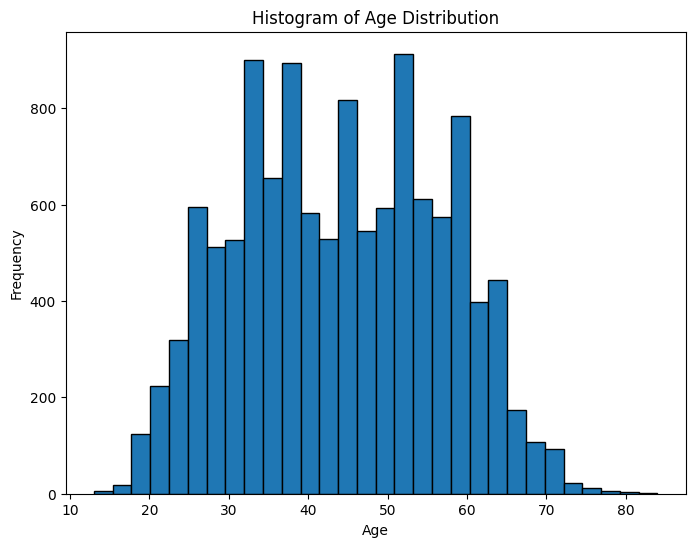

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=30, edgecolor='black')
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

###Bar Chart of Death by Race


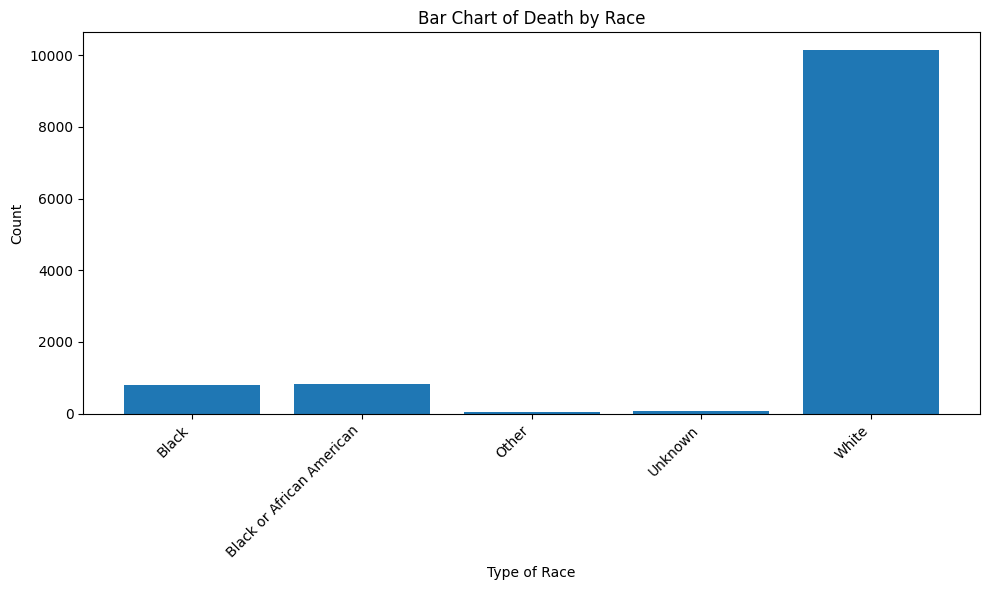

In [ ]:
race_columns_2 = [col for col in data.columns if col.startswith('Race_')]
race_counts_2 = {}  #Create dictionary to store Race counts

for column in race_columns_2:
    race_name = column.replace('Race_', '')  #Extract the Race name
    race_count = data[column].sum()  #Count occurrences
    if race_count > 30: #Apply conditional filter
        race_counts_2[race_name] = race_count

plt.figure(figsize=(10, 6))
plt.bar(race_counts_2.keys(), race_counts_2.values())
plt.title('Bar Chart of Death by Race')
plt.xlabel('Type of Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

###Bar Chart of Deaths by Sex

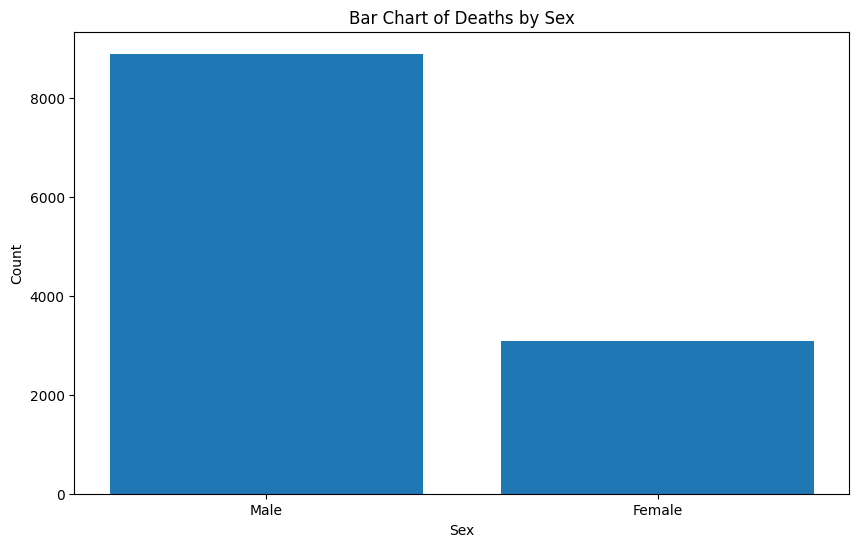

In [ ]:
filtered_sex = data[data['Sex_encoded'].isin([0, 1])]

sex_counts = filtered_sex['Sex_encoded'].value_counts() #Count occurrences

sex_labels = {0: 'Male', 1: 'Female'} #Define Sex labels

plt.figure(figsize=(10, 6))
plt.bar(sex_labels.values(), sex_counts.values)
plt.title('Bar Chart of Deaths by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

###Box Plot of Age by Sex

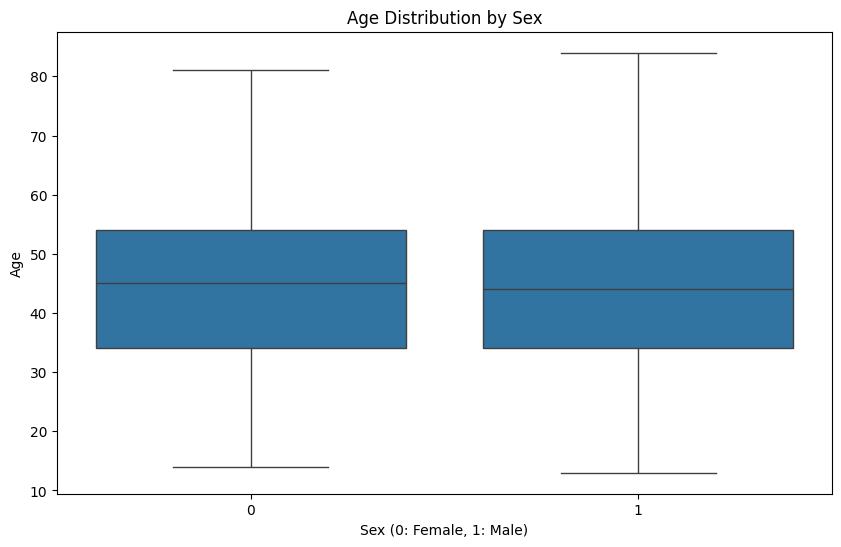

In [ ]:
plt.figure(figsize=(10, 6))

filtered_sex_2 = data[(data['Sex_encoded'] != 2) & (data['Sex_encoded'] != 3)]

sns.boxplot(x='Sex_encoded', y='Age', data=filtered_sex_2)
plt.title('Age Distribution by Sex')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Age')
plt.show()